## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
new_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
num_mice = len(new_df["Mouse ID"])
print(f'The number of mice is {num_mice}.')

The number of mice is 1893.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate_timepoint_df = new_df.loc[new_df.duplicated(subset="Mouse ID"), "Timepoint"]
duplicate_mouse_ids = new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
new_df.loc[new_df['Mouse ID'] == 'g989']


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = new_df.drop_duplicates(subset = "Mouse ID", keep = 'first')
cleaned_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0                 0  
20                  45.0                 0  
30                  45.0                 0  
40                  45.0                 0  
...                  ...               ...  
1858                45.0                 0  
1860                45.0                 0  
1863                45.0                 0  
1873                45.0                 0  
1883                45.0                 0  

[249 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_num_mice = len(cleaned_df["Mouse ID"].unique())
print(f'The number of unique mice is {unique_num_mice}.')

The number of unique mice is 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_df = new_df.groupby('Drug Regimen')

tumor_mean = regimen_df['Tumor Volume (mm3)'].mean()
tumor_median = regimen_df['Tumor Volume (mm3)'].median()
tumor_var = regimen_df['Tumor Volume (mm3)'].var()
tumor_std = regimen_df['Tumor Volume (mm3)'].std()
tumor_sem = regimen_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
sum_regimen_df = pd.DataFrame({'Mean': tumor_mean, 
                               'Median': tumor_median,
                               'Variance': tumor_var,
                               'Standard Deviation': tumor_std, 
                               'SEM': tumor_sem})

sum_regimen_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = new_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'The Total Number of Timepoints for all Mice Tested for Each Drug Regimen')

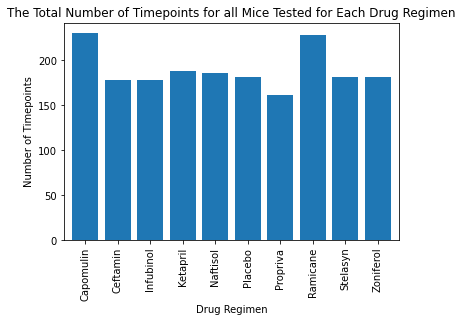

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
reg_df = regimen_df.count()
bar_plot = reg_df['Timepoint'].plot.bar(width = 0.8)

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Timepoints")
bar_plot.set_title("The Total Number of Timepoints for all Mice Tested for Each Drug Regimen")




Text(0.5, 1.0, 'The Total Number of Timepoints for all Mice Tested for Each Drug Regimen')

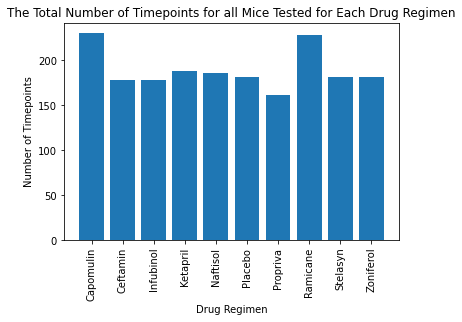

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = reg_df.index.values
plt.bar(x_axis, reg_df['Timepoint'])                
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title('The Total Number of Timepoints for all Mice Tested for Each Drug Regimen')

Text(0, 0.5, '')

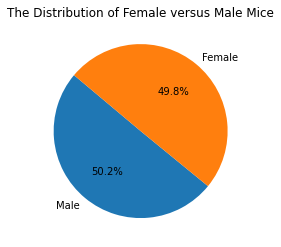

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
num_gender = cleaned_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = num_gender.plot.pie(autopct="%1.1f%%", startangle=140, title='The Distribution of Female versus Male Mice')
pie_plot.set_ylabel('')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(num_gender, autopct="%1.1f%%", startangle=140, labels= num_gender.index.values)
plt.title('The Distribution of Female versus Male Mice')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

(-1.1092527659968812,
 1.1222566193373384,
 -1.109449931456455,
 1.1211462801337193)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timept = new_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(new_df, greatest_timept, how='outer', on='Mouse ID')
new_merged_df = merged_df.rename(columns = {"Timepoint_x": "Timepoint", 
                                           "Timepoint_y": "Greatest Timepoint"})
new_merged_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Greatest Timepoint  
0              45.000000                 0                  45  
1              38.825898                 0                  45  
2              35.014271                 1                  45  
3              34.223992                 1                  45  
4              32.997729                 1                  45  
...                  ...               ...                 ...  
1888           63.145652                 2                  45  
1889           65.841013                 3                  45  
1890           69.176246                 4                  45  
1891           70.314904                 4                  45  
1892           73.867845                 4                  45  

[1893 rows x 9 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatments:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    loc_df = new_merged_df.loc[new_merged_df['Drug Regimen'] == x]
    
    # add subset 
    final_volume_df = loc_df.loc[loc_df['Timepoint'] == loc_df['Greatest Timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_vol.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {x}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')
    
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                 (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {x} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


([<matplotlib.axis.XTick at 0x1b48e7196a0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

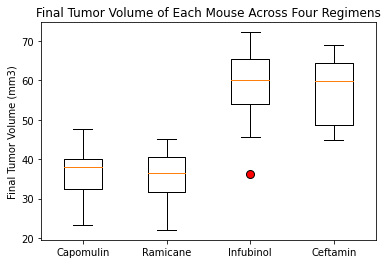

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(tumor_vol, flierprops=flierprops)

plt.title('Final Tumor Volume of Each Mouse Across Four Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = new_df.loc[new_df['Mouse ID'] == new_df.set_index(new_df["Drug Regimen"]).loc["Capomulin"]["Mouse ID"][0]]
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID "{new_df.set_index(new_df["Drug Regimen"]).loc["Capomulin"]["Mouse ID"][0]}"')

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint for Mouse ID "s185"')

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

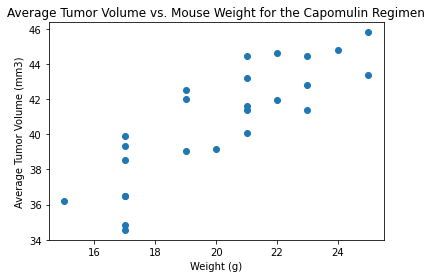

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = new_df.loc[new_df['Drug Regimen'] == 'Capomulin']
avg_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()
new_avg_df = pd.merge(cap_df, avg_df, on='Mouse ID').rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume (mm3)",
                                                                     "Tumor Volume (mm3)_y":"Average Tumor Volume (mm3)"})
cleaned_avg_df = new_avg_df[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
cleaned_avg_df

plt.scatter(cleaned_avg_df['Weight (g)'], cleaned_avg_df['Average Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.8419363424694721.


Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen with Regression Line')

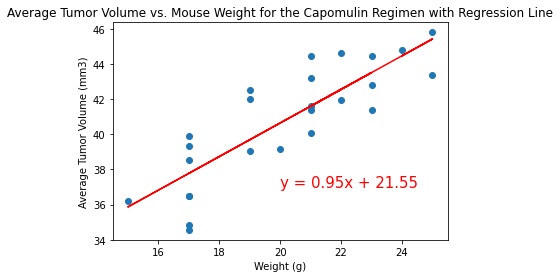

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = cleaned_avg_df['Weight (g)']
y = cleaned_avg_df['Average Tumor Volume (mm3)']
# Correlation coefficient
correlation = st.pearsonr(x,y)
print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {correlation[0]}.')

# Linear Regression ##Tutor##REVIEW!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(cleaned_avg_df['Weight (g)'], cleaned_avg_df['Average Tumor Volume (mm3)'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(cleaned_avg_df['Weight (g)'], cleaned_avg_df['Average Tumor Volume (mm3)'])
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen with Regression Line')

## Observations

In [19]:
# 1. The correlation between weight and average tumor volume on the Capomulin regimen is 0.84, which means the ralationship beteen weight and average tumor volume on the Capomulin regimen is stronge.
# 2. The distribution of female versus male mice is almost half and half which means gender may have nothing to do with the study result.
# 3. Mice used the Capomulin have the most number of timepoints and mice used Propriva have the least number of timepoints.